[[0, 0], [0, 5060], [7844, 5060], [7844, 0]]
2


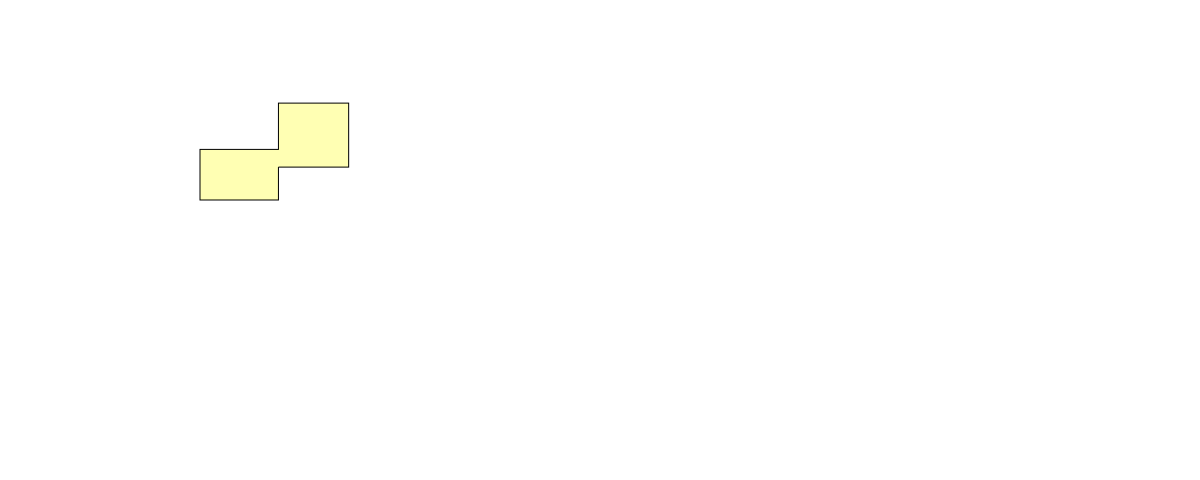

In [4]:
"""
Synth.ipynb
- [ ] Generate rooms using boolean unions
- [ ] Pick random extinguisher placements
- [ ] Calculate remote locations
- [ ] Deliver verdict
- [ ] Export to JSON dataset.
"""
__author__ = "Bob YX Lee"
import sys
import os
import json
import drawsvg as dw
import random
from copy import deepcopy

sys.path.append("./packages")

from geom.Line2D import Line2D, drawPt
from geom import Poly2D, Bool2D
import numpy as np
import pyclipper

"""
Generation logic
- Generate a randomly sized rectangle
- Pick a random point along the walls divided into 5m pieces
- Generate another random rectangle
- Place it at the point
- Execute boolean union
- Repeat
"""
SCALE = 100
DIVLEN = 500

WIDTHS = list(range(5000,10000))
DEPTHS = list(range(5000,7000))

def newCanvas():
    return dw.Drawing(1200, 480, origin = (-SCALE*2, -SCALE*2))

def randRect(origin = [0,0]):
    return Poly2D.rect2D(random.choice(WIDTHS), random.choice(DEPTHS), origin)

d = newCanvas()
rect = randRect()
print(rect)
Poly2D.drawPath(d, rect, True, fill = "gray", fill_opacity=1)

lines = Poly2D.getLines(rect, True)

#print(lines)
divvy = []

side = random.choice(list(range(len(lines))))
print(side)

divvy.extend(lines[side].divideByLength(DIVLEN))
pts = [l.mid for l in divvy]
expt = random.choice(pts)

# Just union them and don't think too much about it.
rect2 = randRect(expt)
Poly2D.drawPath(d, rect2, True)
result = Bool2D.union([rect, rect2])

d2 = newCanvas()
for r in result:
    Poly2D.drawPath(d2, r, True)

d2